In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Resampling
from sklearn.utils import resample

# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Splitting
from sklearn.model_selection import train_test_split

# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [2]:
data=pd.read_csv('heartdataset.csv')
data.shape

(4240, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

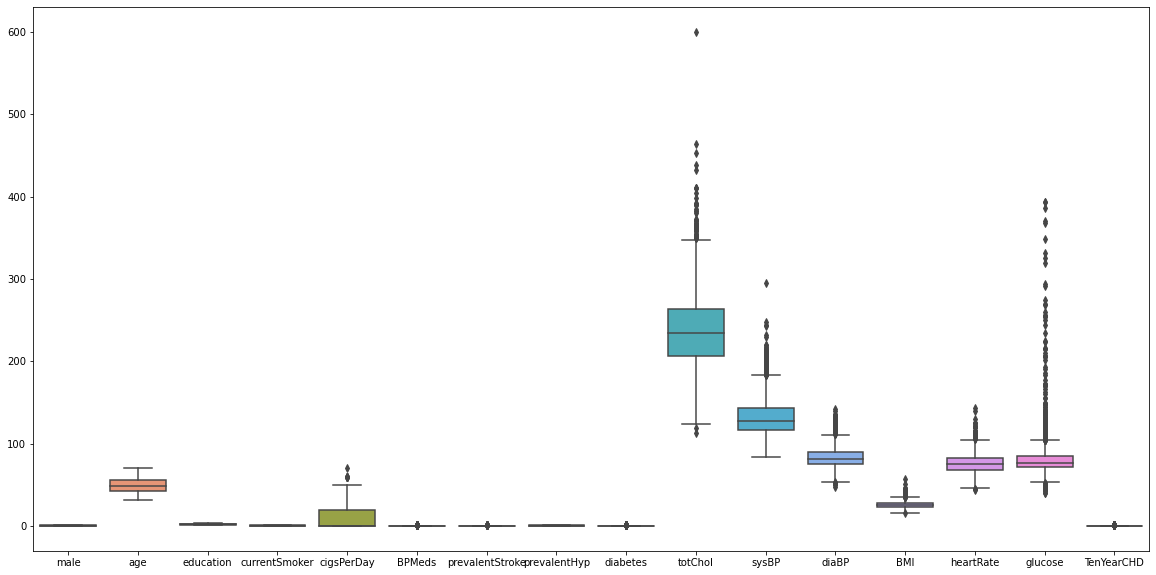

In [9]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022696,0.013049,0.200757,0.325601,-0.050022,-0.003622,0.007670,0.016900,-0.068703,-0.033434,0.058723,0.079214,-0.115969,0.008608,0.091245
age,-0.022696,1.000000,-0.161089,-0.213671,-0.190600,0.128447,0.045064,0.304496,0.104776,0.269799,0.389814,0.206171,0.134673,-0.008337,0.115845,0.229725
education,0.013049,-0.161089,1.000000,0.018365,0.006507,-0.010113,-0.028570,-0.081464,-0.034756,-0.023161,-0.128237,-0.063298,-0.136251,-0.058110,-0.031169,-0.054168
currentSmoker,0.200757,-0.213671,0.018365,1.000000,0.770872,-0.048914,-0.032530,-0.105762,-0.040224,-0.048890,-0.130899,-0.109851,-0.164975,0.052285,-0.051922,0.022234
cigsPerDay,0.325601,-0.190600,0.006507,0.770872,1.000000,-0.043981,-0.033951,-0.066930,-0.036207,-0.026404,-0.087943,-0.051265,-0.087834,0.068029,-0.051245,0.059124
BPMeds,-0.050022,0.128447,-0.010113,-0.048914,-0.043981,1.000000,0.127485,0.259582,0.047643,0.086179,0.260403,0.195993,0.103018,0.016321,0.054261,0.089867
prevalentStroke,-0.003622,0.045064,-0.028570,-0.032530,-0.033951,0.127485,1.000000,0.067277,0.009545,0.007987,0.055160,0.049279,0.031398,-0.012108,0.016471,0.044834
prevalentHyp,0.007670,0.304496,-0.081464,-0.105762,-0.066930,0.259582,0.067277,1.000000,0.075005,0.164943,0.693882,0.615489,0.304473,0.151198,0.084334,0.176236
diabetes,0.016900,0.104776,-0.034756,-0.040224,-0.036207,0.047643,0.009545,0.075005,1.000000,0.044545,0.101041,0.051252,0.082777,0.051465,0.609132,0.089297
totChol,-0.068703,0.269799,-0.023161,-0.048890,-0.026404,0.086179,0.007987,0.164943,0.044545,1.000000,0.214536,0.171537,0.123195,0.088375,0.049247,0.082552


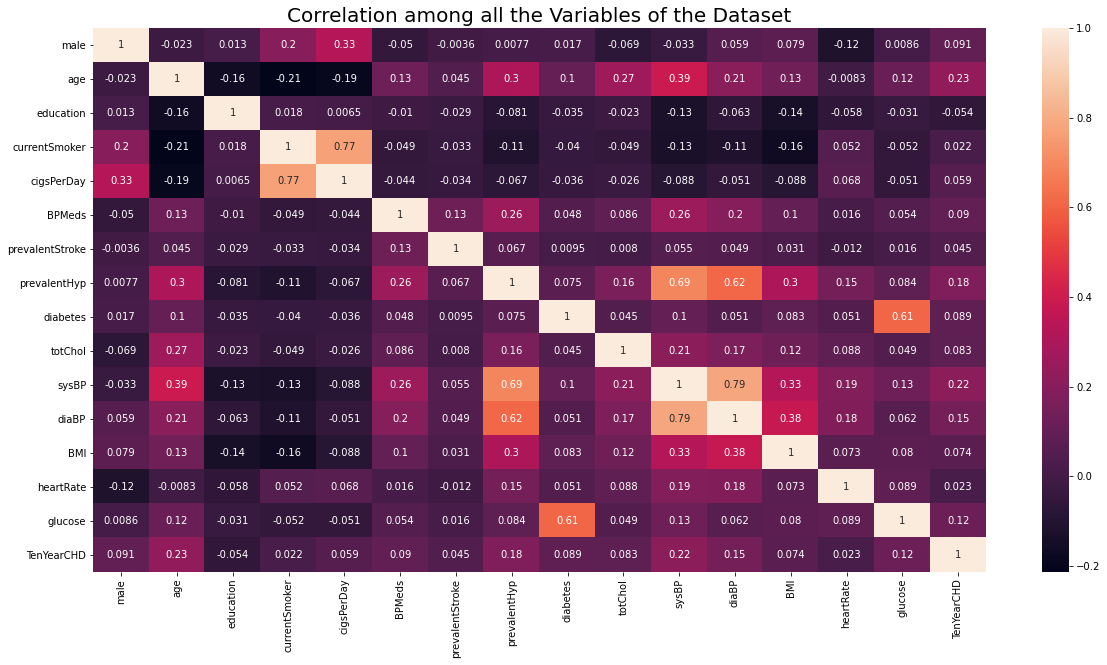

In [10]:

#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [11]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [12]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

male :
0    2261
1    1728
Name: male, dtype: int64
-----------------
education :
1.0    1654
2.0    1210
3.0     666
4.0     459
Name: education, dtype: int64
-----------------
currentSmoker :
0    2030
1    1959
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3872
1.0     117
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3967
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2754
1    1235
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3888
1     101
Name: diabetes, dtype: int64
-----------------


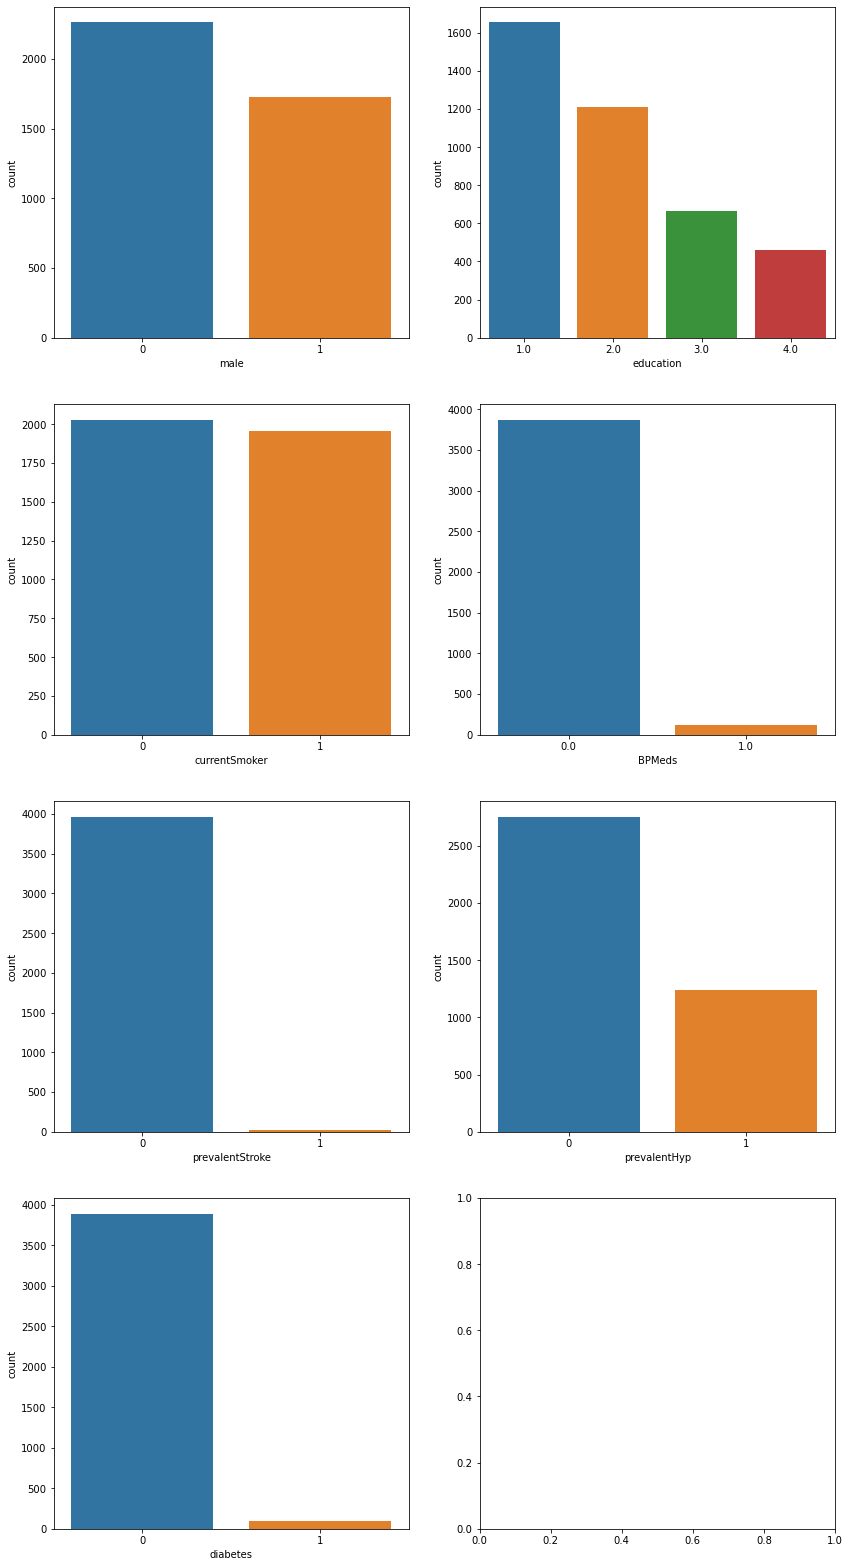

In [13]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w')
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

In [14]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

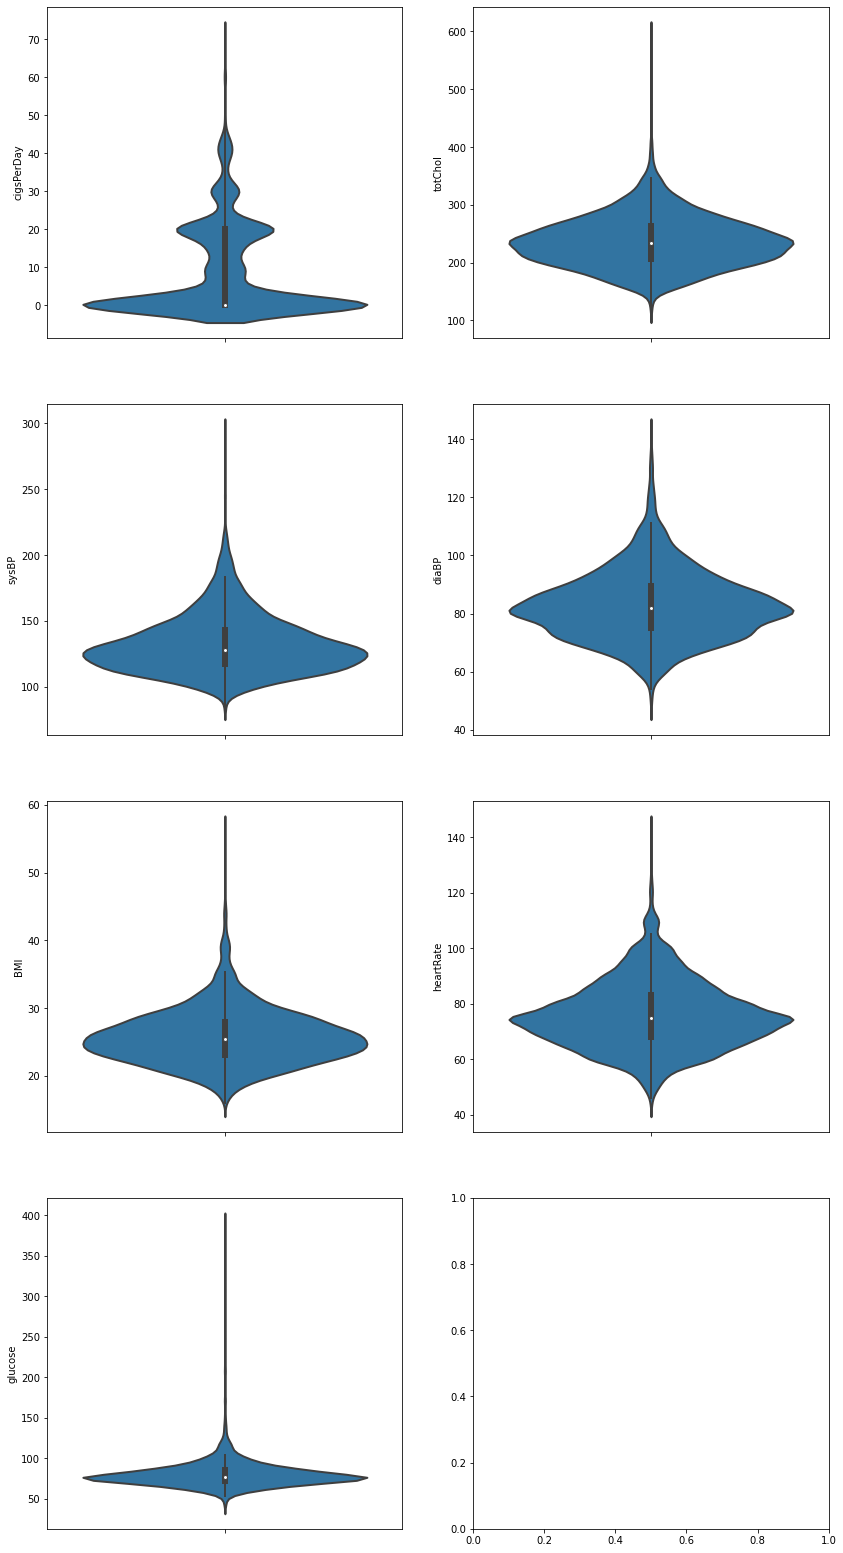

In [15]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w')
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)

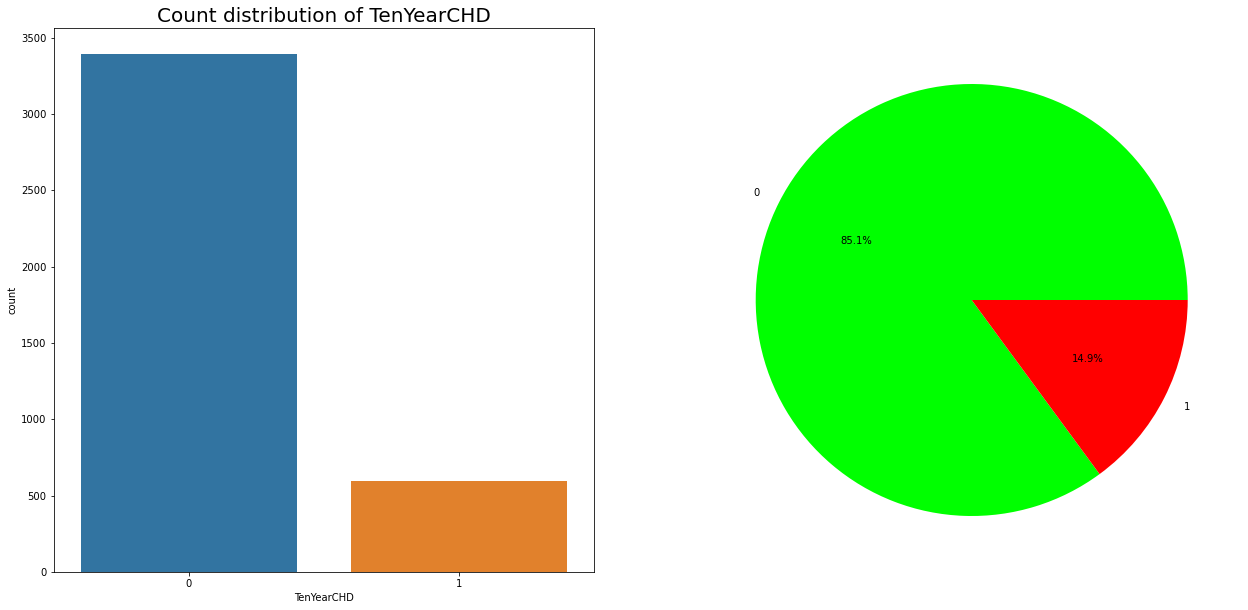

In [16]:
#Distribution of outcome variable, Heart Disease

plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

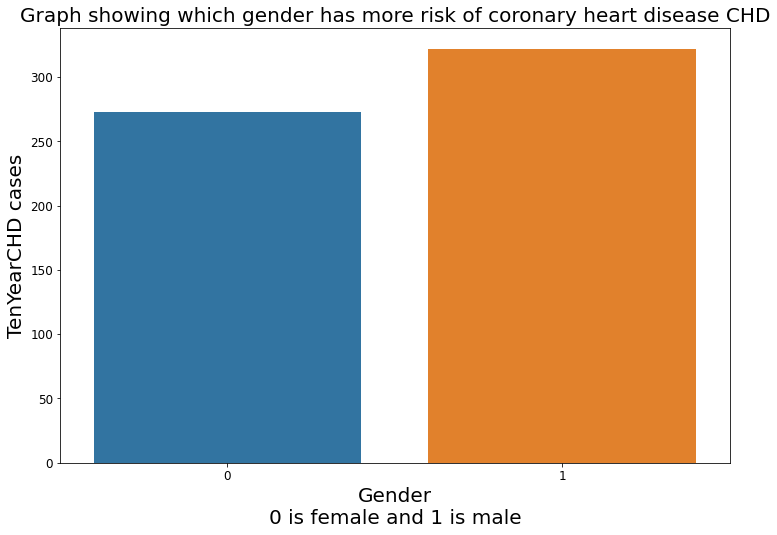

In [17]:
#Ploting the above values
graph_2 = data.groupby("male", as_index=False).TenYearCHD.sum()
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

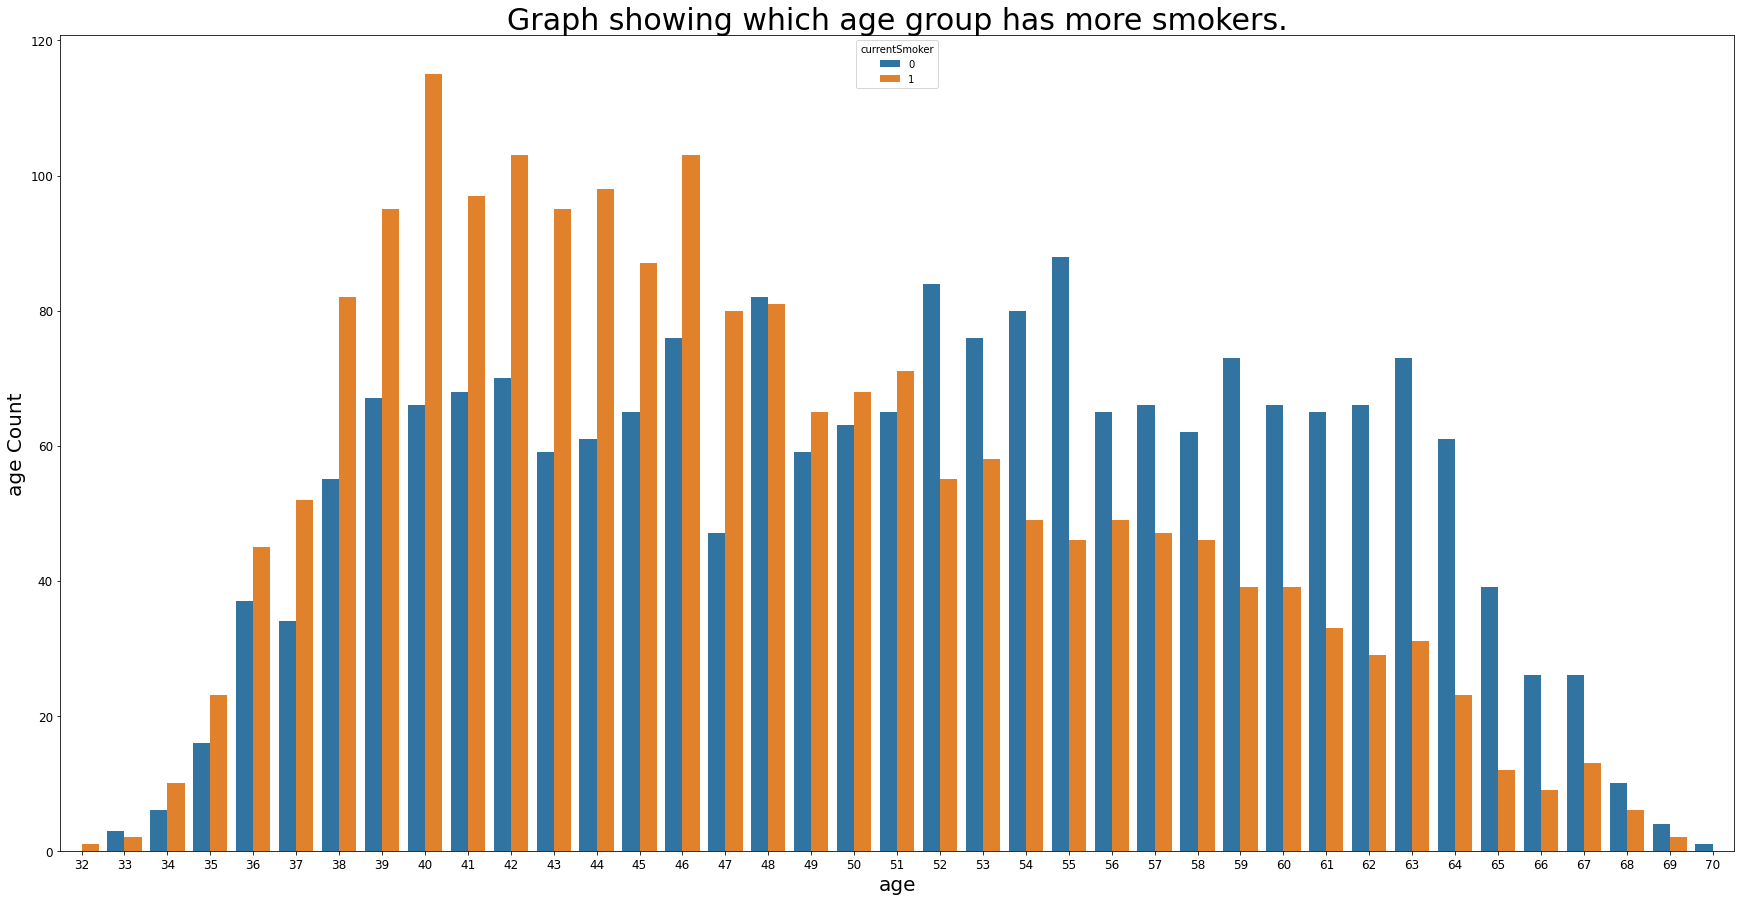

In [18]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

<Figure size 864x576 with 0 Axes>

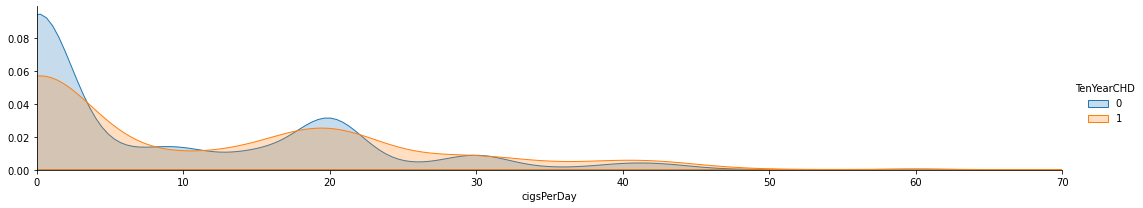

In [19]:
plt.figure(figsize=(12,8), facecolor='w')
as_fig = sns.FacetGrid(data,hue='TenYearCHD',aspect=5)
as_fig.map(sns.kdeplot,'cigsPerDay',shade=True)
hc = data['cigsPerDay'].max()
as_fig.set(xlim=(0,hc))
as_fig.add_legend()

<Figure size 864x576 with 0 Axes>

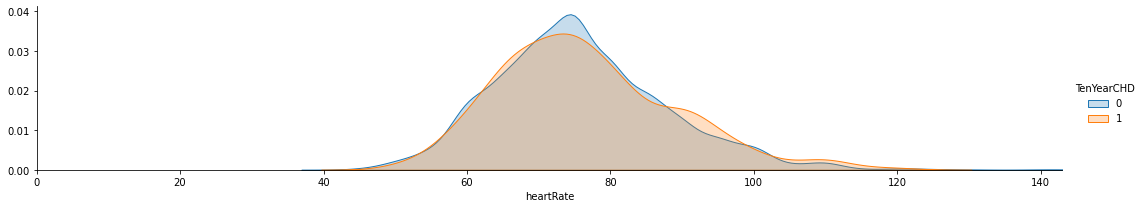

In [20]:
plt.figure(figsize=(12,8), facecolor='w')
as_fig = sns.FacetGrid(data,hue='TenYearCHD',aspect=5)
as_fig.map(sns.kdeplot,'heartRate',shade=True)
hc = data['heartRate'].max()
as_fig.set(xlim=(0,hc))
as_fig.add_legend()

<Figure size 864x576 with 0 Axes>

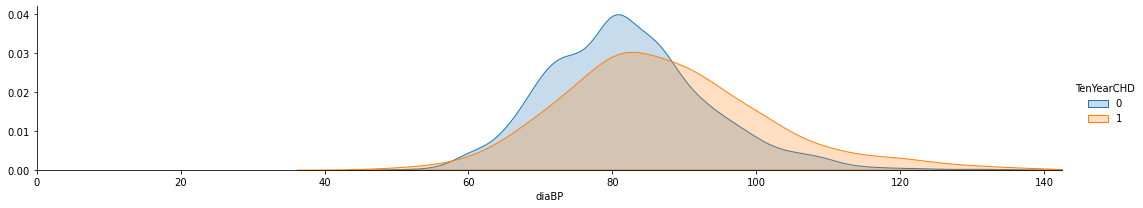

In [21]:
plt.figure(figsize=(12,8), facecolor='w')
as_fig = sns.FacetGrid(data,hue='TenYearCHD',aspect=5)
as_fig.map(sns.kdeplot,'diaBP',shade=True)
hc = data['diaBP'].max()
as_fig.set(xlim=(0,hc))
as_fig.add_legend()

<Figure size 864x576 with 0 Axes>

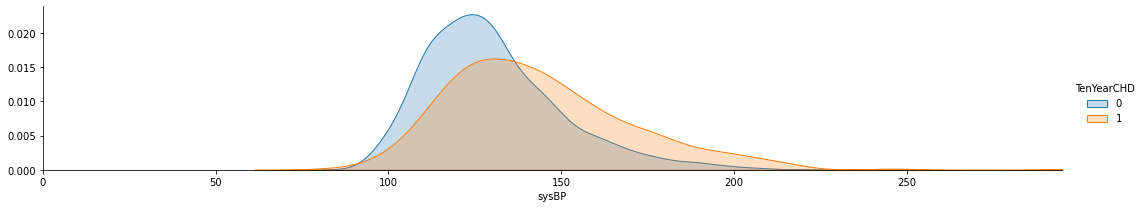

In [22]:
plt.figure(figsize=(12,8), facecolor='w')
as_fig = sns.FacetGrid(data,hue='TenYearCHD',aspect=5)
as_fig.map(sns.kdeplot,'sysBP',shade=True)
hc = data['sysBP'].max()
as_fig.set(xlim=(0,hc))
as_fig.add_legend()

In [23]:
# handeling imbalanced data using Resampeling Technique

target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()

0    3394
1    3394
Name: TenYearCHD, dtype: int64

In [24]:
data=target
np.shape(data)

(6788, 16)

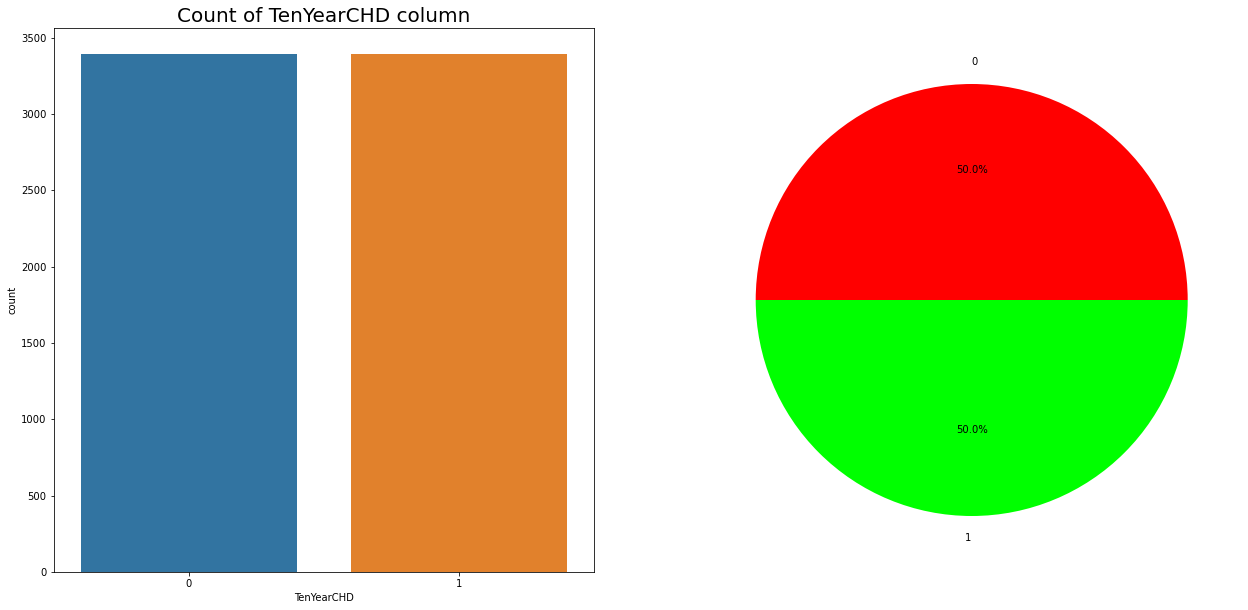

In [25]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

In [26]:
data.shape

(6788, 16)

In [27]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data.shape

male                1.00
age                14.00
education           2.00
currentSmoker       1.00
cigsPerDay         20.00
BPMeds              0.00
prevalentStroke     0.00
prevalentHyp        1.00
diabetes            0.00
totChol            57.00
sysBP              30.00
diaBP              16.00
BMI                 5.15
heartRate          16.00
glucose            15.00
TenYearCHD          1.00
dtype: float64


(6788, 16)

In [28]:
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(5526, 16)

Text(0.5, 1.0, 'Count distribution of TenYearCHD')

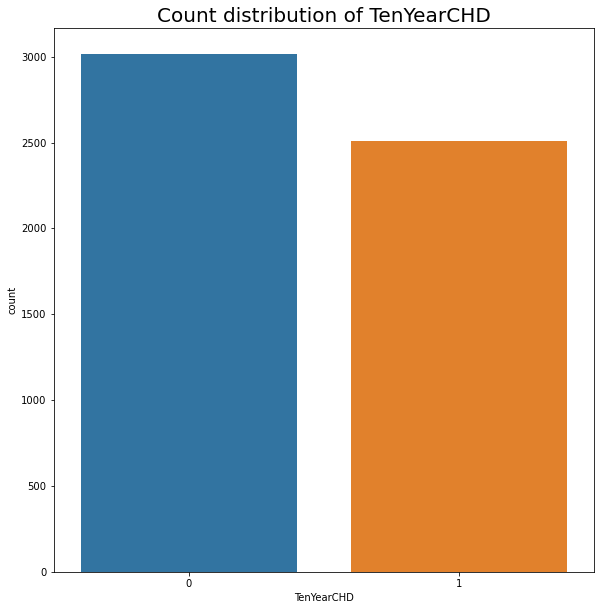

In [29]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
y = df['TenYearCHD']
x= df.drop(['TenYearCHD'], axis=1)
colnames=data.columns
model= RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [31]:
rfe=RFE(model,n_features_to_select=1,verbose=2)
fit=rfe.fit(x,y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [32]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), colnames)))

Features sorted by their rank:
[(1, 'BMI'), (2, 'sysBP'), (3, 'totChol'), (4, 'age'), (5, 'glucose'), (6, 'diaBP'), (7, 'heartRate'), (8, 'cigsPerDay'), (9, 'education'), (10, 'male'), (11, 'prevalentHyp'), (12, 'currentSmoker'), (13, 'diabetes'), (14, 'prevalentStroke'), (15, 'BPMeds')]


In [33]:
data=df[['male','age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]
data.head()

,male,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [34]:
Y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.4, random_state=1)

In [35]:
logistic=LogisticRegression()
logistic.fit(train_x,train_y)
logispredicted=logistic.predict(test_x)


#RandomForest Classifier
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(train_x, train_y)
predicted = randomforest.predict(test_x)


#DecisionTree Classifier
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(train_x, train_y)
decisiontree_predicted = decisiontree.predict(test_x)

#KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x, train_y)
knn_predicted = knn.predict(test_x)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print('Logestic Regression:',accuracy_score(test_y,logispredicted)*100)
print('Random Forest:      ',accuracy_score(test_y,predicted)*100)
print('Decision tree:      ',accuracy_score(test_y, decisiontree_predicted)*100)
print('KNN:                ',accuracy_score(test_y, knn_predicted)*100)

Logestic Regression: 65.58118498417006
Random Forest:       95.74853007688829
Decision tree:       88.01447308909995
KNN:                 77.83808231569425


In [37]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[879 326]
 [401 605]]


Accuracy of Logistic Regression: 67.11895070104026 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1205
           1       0.65      0.60      0.62      1006

    accuracy                           0.67      2211
   macro avg       0.67      0.67      0.67      2211
weighted avg       0.67      0.67      0.67      2211



In [38]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1008  197]
 [  38  968]]


Accuracy of k-NN Classification: 89.37132519222072 

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1205
           1       0.83      0.96      0.89      1006

    accuracy                           0.89      2211
   macro avg       0.90      0.90      0.89      2211
weighted avg       0.90      0.89      0.89      2211



In [39]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1118   87]
 [  40  966]]


Accuracy of Random Forest: 94.25599276345545 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1205
           1       0.92      0.96      0.94      1006

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [40]:
print('Testing the model:',rf.predict(np.array([[1,39,4,0,195,106,70,27,80,77]])))

Testing the model: [0]


In [41]:
print('Testing the model:',rf.predict(np.array([[0,42,4,0,250,115,79,27,65,79]])))

Testing the model: [0]


In [42]:
print('Testing the model:',rf.predict(np.array([[1,40,1,43,290,138,90,28,85,73]])))

Testing the model: [1]


In [43]:
print('Testing the model:',rf.predict(np.array([[0,41,3,30,187,154,100,21,66,78]])))

Testing the model: [1]


In [44]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[982 223]
 [ 30 976]]


Accuracy of DecisionTreeClassifier: 88.55721393034825 

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1205
           1       0.81      0.97      0.89      1006

    accuracy                           0.89      2211
   macro avg       0.89      0.89      0.89      2211
weighted avg       0.90      0.89      0.89      2211



In [45]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[908 297]
 [276 730]]


Accuracy of Gradient Boosting Classifier: 74.08412483039348 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1205
           1       0.71      0.73      0.72      1006

    accuracy                           0.74      2211
   macro avg       0.74      0.74      0.74      2211
weighted avg       0.74      0.74      0.74      2211



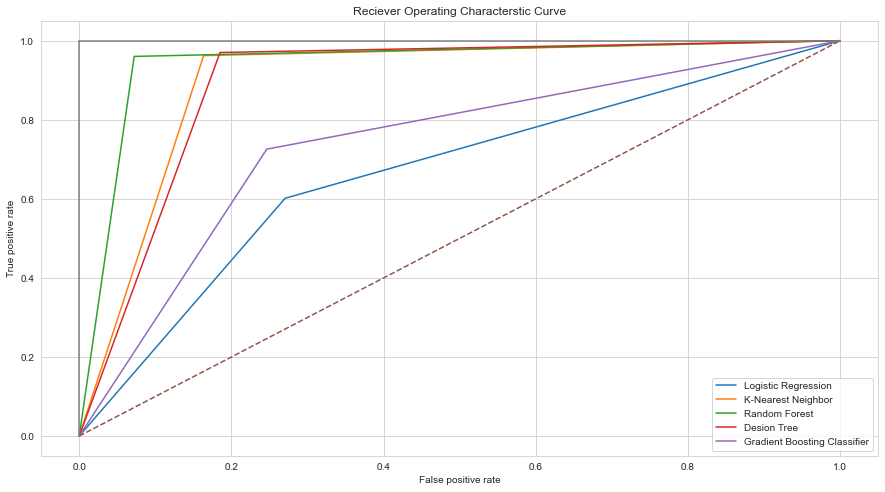

In [46]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gvc_false_positive_rate,gvc_true_positive_rate,gvc_threshold = roc_curve(test_y,gvc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gvc_false_positive_rate,gvc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [47]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gvc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,67.118951
1,K-Nearest Neighbour,89.371325
2,Random Forest,94.255993
3,Decision Tree,88.557214
4,Gradient Boosting,74.084125


In [48]:
data.describe()

,male,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000,5526.000000
mean,0.499638,50.628484,1.964893,9.902823,237.118350,132.059899,82.549584,25.569739,75.029316,77.931053,0.454397
std,0.500045,8.591022,1.044459,12.224808,41.089063,19.547488,11.062025,3.516761,11.018957,10.492908,0.497961
min,0.000000,32.000000,1.000000,0.000000,126.000000,83.500000,52.000000,15.540000,44.000000,50.000000,0.000000
25%,0.000000,43.000000,1.000000,0.000000,208.000000,118.000000,75.000000,23.080000,67.000000,71.000000,0.000000
50%,0.000000,50.000000,2.000000,2.000000,235.000000,129.000000,82.000000,25.410000,75.000000,76.000000,0.000000
75%,1.000000,58.000000,3.000000,20.000000,264.000000,144.000000,90.000000,27.930000,82.000000,84.000000,1.000000
max,1.000000,69.000000,4.000000,50.000000,352.000000,195.000000,115.500000,36.070000,108.000000,108.000000,1.000000


In [49]:
import pickle
pickle.dump(rf,open('modelheart.pkl','wb'))
model=pickle.load(open('modelheart.pkl','rb'))